In [ ]:
import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt


In [ ]:
def generate_real():
  real_data=torch.FloatTensor([1,0,1,0])
  return real_data

In [ ]:
import random

def generate_real():
  real_data=torch.FloatTensor(
      [random.uniform(0.8,1.0),
       random.uniform(0.0,0.2),
       random.uniform(0.8,1.0),
       random.uniform(0.0,0.2)]
  )

  return real_data

In [ ]:
generate_real()

tensor([0.8718, 0.1236, 0.8499, 0.1892])

In [ ]:
%config IPCompleter.greedy=True


In [ ]:
generate_real()

tensor([0.8022, 0.0836, 0.8992, 0.0642])

In [33]:
class Discriminator(nn.Module):

  def __init__(self):
    super().__init__()

    self.model=nn.Sequential(
        nn.Linear(4,3),
        nn.Sigmoid(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )

    self.loss_function=nn.MSELoss()

    self.optimiser=torch.optim.SGD(self.parameters(),lr=0.01)

    self.counter=0
    self.progress=[]

    pass


  def forward(self,inputs):
    return self.model(inputs)


  def train(self,inputs,targets):
    outputs=self.forward(inputs)
    loss=self.loss_function(outputs,targets)

    self.counter+=1

    if(self.counter %10 ==0):
      self.progress.append(loss.item())
      pass
    if (self.counter % 10000 ==0):
      print("counter = " ,self.counter)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
     df=pandas.DataFrame(self.progress,columns=['loss'])
     df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker=".",
            grid=True,yticks=(0,0.25,0.5))
     pass






In [ ]:
def generate_random(size):
  random_data=torch.rand(size)
  return random_data

In [ ]:
generate_random(4)

tensor([0.1074, 0.7809, 0.0360, 0.2957])

In [ ]:
D=Discriminator()
for i in range(10000):

  D.train(generate_real(),torch.FloatTensor([1.0]))
  D.train(generate_random(4),torch.FloatTensor([0.0]))

  pass

counter =  10000
counter =  20000


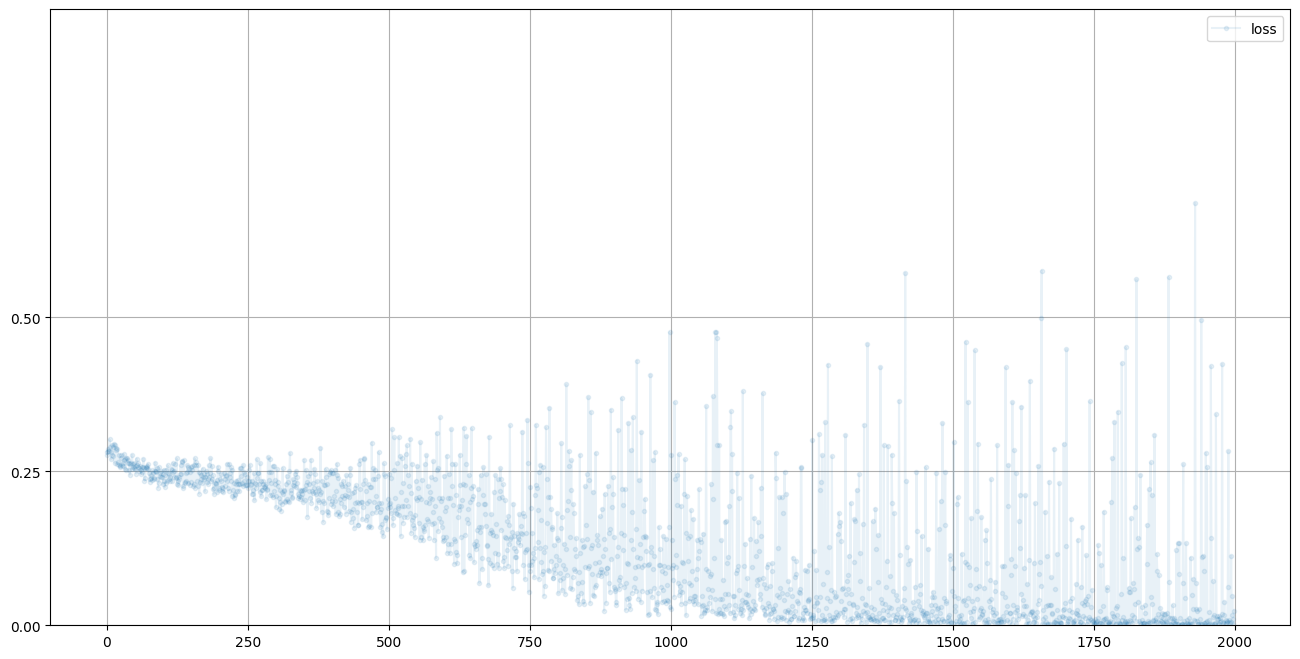

In [ ]:
D.plot_progress()

In [ ]:
print(D.forward(generate_real()).item())
print(D.forward(generate_random(4)).item())

0.8387961387634277
0.18346992135047913


In [35]:
class Generator(nn.Module):

  def __init__(self):
    super().__init__()


    self.model=nn.Sequential(
        nn.Linear(1,3),
        nn.Sigmoid(),
        nn.Linear(3,4),
        nn.Sigmoid()
    )

    self.optimiser=torch.optim.SGD(self.parameters(),lr=0.01)

    self.counter=0
    self.progress=[]

    pass

  def forward(self,inputs):

    return self.model(inputs)


  def train(self,D,inputs,targets):

    g_output=self.forward(inputs)

    d_output=D.forward(g_output)

    loss=D.loss_function(d_output,targets)

    self.counter+=1
    if (self.counter % 10 ==0):
      self.progress.append(loss.item())
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()


    pass

  def plot_progress(self):
    df=pandas.DataFrame(self.progress,columns=['loss'])
    df.plot(ylim=(0,1.0),figsize=(16,8),alpha=0.1,marker=".",grid=True,yticks=(0,0.25,0.5))
    pass




In [27]:
G=Generator()
G.forward(torch.FloatTensor([0.5]))


tensor([0.5126, 0.5814, 0.5768, 0.3669], grad_fn=<SigmoidBackward0>)

In [46]:
%%time

image_list=[]

D=Discriminator()
G=Generator()

for i in range(10000):

  D.train(generate_real(),torch.FloatTensor([1.0]))
  D.train(G.forward(torch.FloatTensor([0.5])).detach(),torch.FloatTensor([0.0]))

  G.train(D,torch.FloatTensor([0.5]),torch.FloatTensor([1.0]))

  if ( i % 1000 ==0):
    image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())





counter =  10000
counter =  20000
CPU times: user 23.6 s, sys: 367 ms, total: 23.9 s
Wall time: 24.1 s


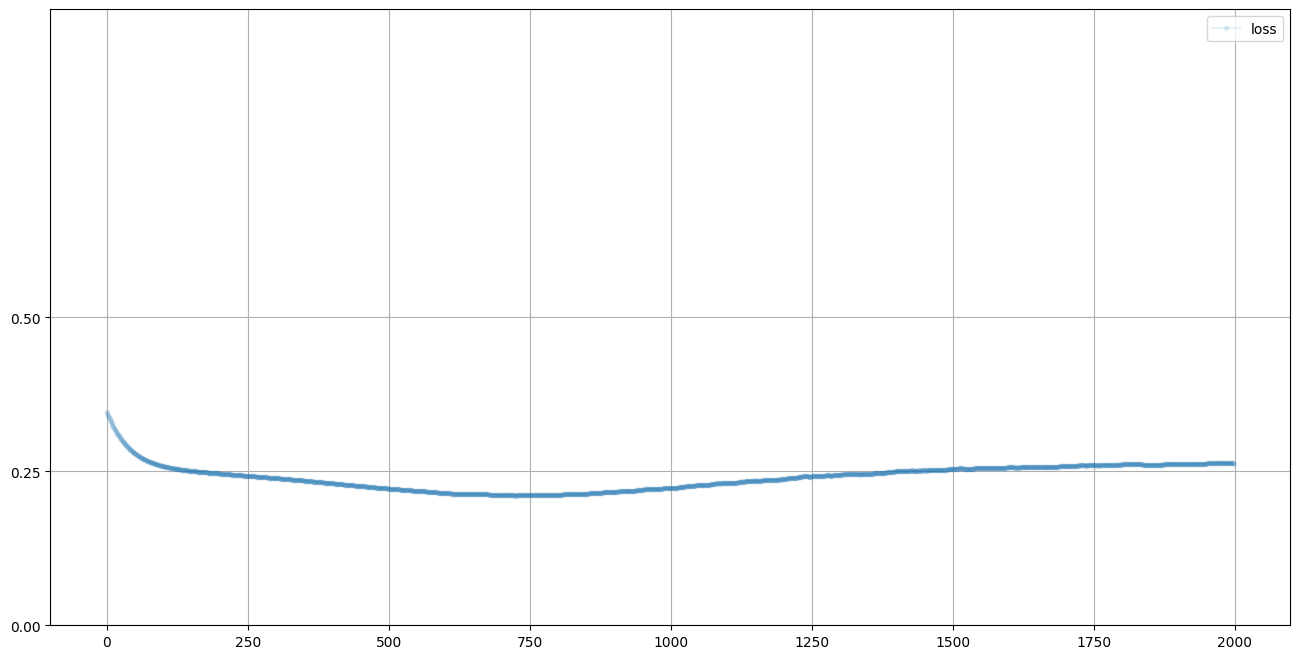

In [39]:
D.plot_progress()

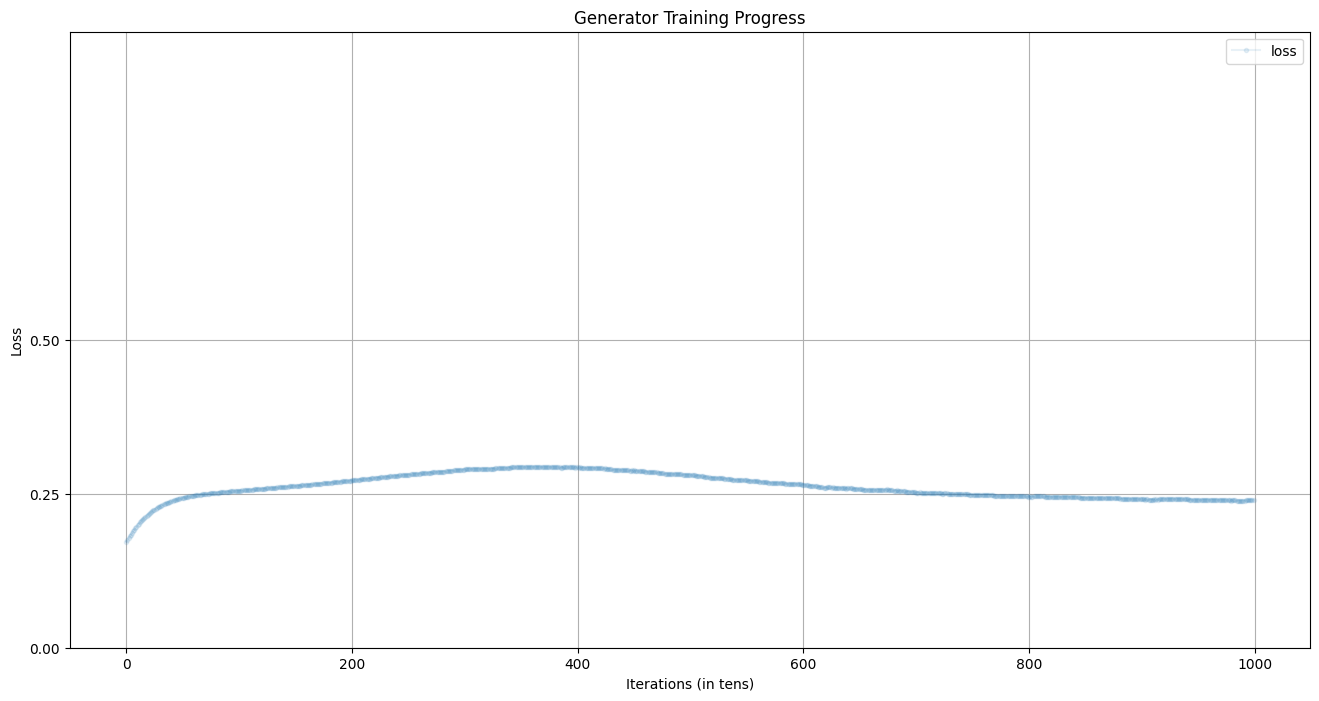

In [40]:
G.plot_progress()

In [37]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

class Generator(nn.Module):

    def __init__(self):
        super(Generator, self).__init__()

        # Define the generator model
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        # Define the optimizer for the generator
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        # Counter to keep track of iterations
        self.counter = 0
        self.progress = []

    def forward(self, inputs):
        # Forward pass through the generator model
        return self.model(inputs)

    def train(self, D, inputs, targets):
        # Train the generator against the discriminator

        # Generate outputs from the generator
        g_output = self.forward(inputs)

        # Pass generated outputs through the discriminator
        d_output = D.forward(g_output)

        # Calculate loss based on discriminator's output
        loss = D.loss_function(d_output, targets)

        # Record loss for plotting
        self.counter += 1
        if self.counter % 10 == 0:
            self.progress.append(loss.item())

        # Zero gradients, perform backward pass, and update weights
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    def plot_progress(self):
        # Plot the training progress (loss over iterations)
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16, 8), alpha=0.1, marker=".", grid=True, yticks=[0, 0.25, 0.5])
        plt.xlabel('Iterations (in tens)')
        plt.ylabel('Loss')
        plt.title('Generator Training Progress')
        plt.show()


In [41]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.9319, 0.0501, 0.8997, 0.0551], grad_fn=<SigmoidBackward0>)

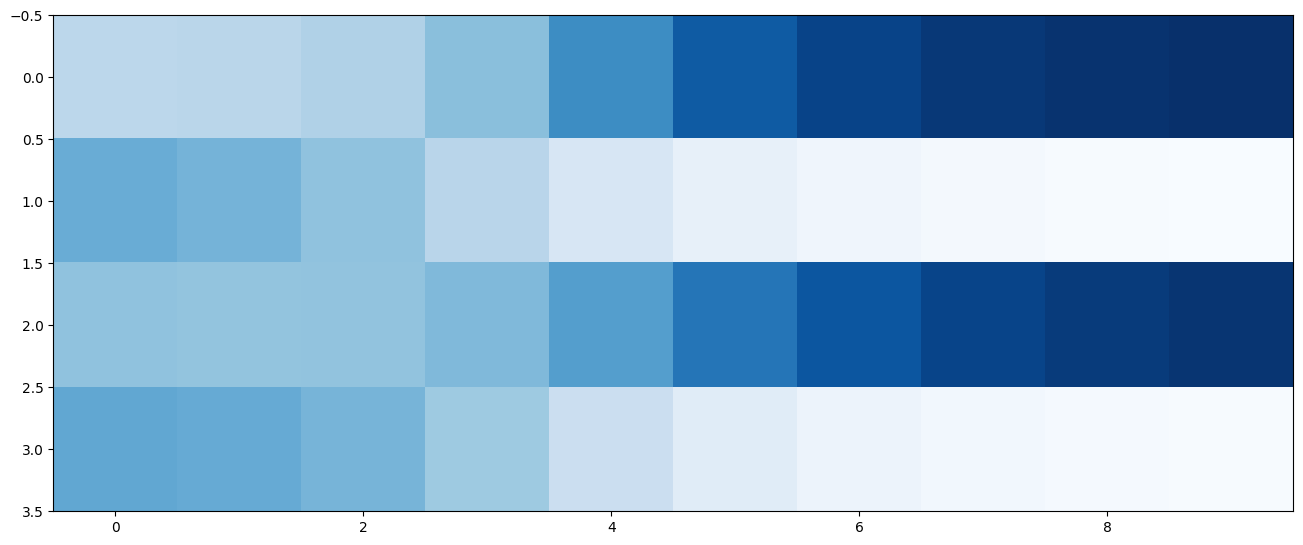

In [48]:
import numpy as numpy

plt.figure(figsize =(16,8))
plt.imshow(numpy.array(image_list).T,interpolation='none',cmap='Blues')